In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_show(im):
    plt.axis("off")
    plt.imshow(im, cmap="gray")
    plt.show()

def cv_show(im,msg):
    cv2.imshow(msg,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()	

In [3]:
def split4(img):
    h, w = img.shape # rows, cols
    h_half = h // 2
    w_half = w // 2

    img_11 = img[:h_half, :w_half] #top-left
    img_12 = img[:h_half, w_half:] #top-right
    img_21 = img[h_half:, :w_half] #bottom-left
    img_22 = img[h_half:, w_half:] #bottom-right

    return img_11, img_12, img_21, img_22

## Main Processing, First is to get image array. 

Local/Adaptive Thresholding = การใช้เกณฑ์ (threshold) ที่แตกต่างกันในแต่ละพื้นที่ของภาพ
- Local Thresholding = แบ่งภาพเป็นบล็อกใหญ่ ๆ แล้วหา threshold แยกตามบล็อก
- Adaptive Thresholding = คำนวณ threshold แบบละเอียดในพื้นที่เล็ก ๆ รอบพิกเซล (ละเอียดกว่า)

### เปรียบเทียบวิธี Adaptive/Local ต่าง ๆ

| วิธี | การแบ่งภาพ | การคำนวณเกณฑ์ | ขนาดพื้นที่ |
|------|----------|---------------|-----------|
| **Local Splits** | แบ่งเป็นบลอกใหญ่ (4, 9, 16 ส่วน) | Otsu/Intermean แต่ละบลอก | ใหญ่ (แบ่งภาพทั้งหมด) |
| **Adaptive Threshold (OpenCV)** | บลอกเล็ก ๆ รอบพิกเซล | Mean/Gaussian แต่ละพิกเซล | เล็ก (11x11, 15x15 พิกเซล) |


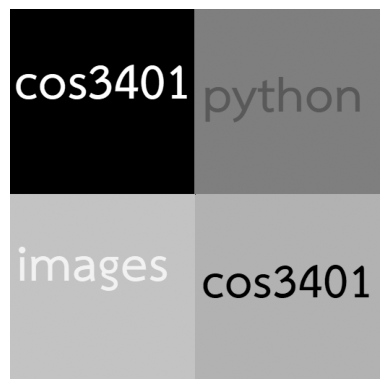

In [4]:
img = cv2.imread('./img/gray3.png', 0)
plt_show(img)

In [5]:
x = split4(img)

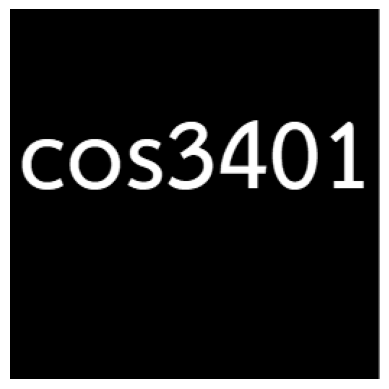

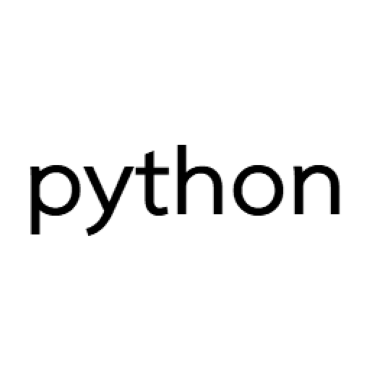

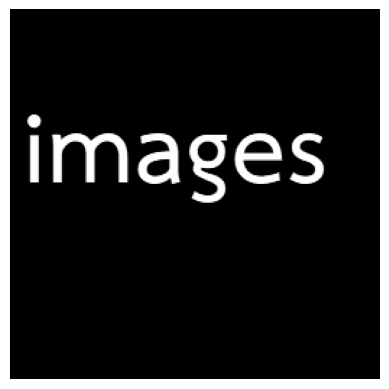

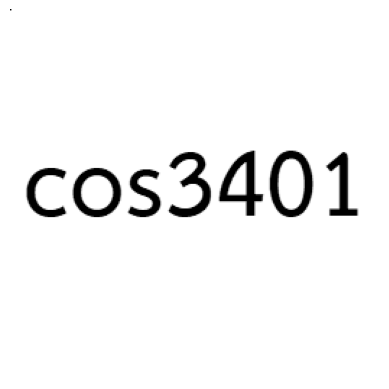

In [6]:
for a  in x: 
    plt_show(a)

In [7]:
def MergeLocal(x, out):
    h, w = out.shape
    h_half = h // 2
    w_half = w // 2
    out[:h_half, :w_half] = x[0]
    out[:h_half, w_half:] = x[1]
    out[h_half:, :w_half] = x[2]
    out[h_half:, w_half:] = x[3]
    return out
    


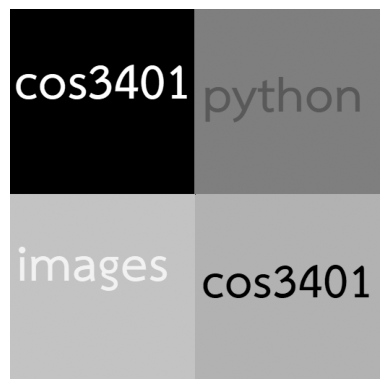

In [8]:
out = np.zeros_like(img, dtype='uint8')
out = MergeLocal(x, out)
plt_show(out)
